In [100]:
import numpy as np
import matplotlib.pyplot as plt


In [101]:
#Create a random matrix with a frame of 0 (natural number).
def CreateRandomMatrix():
    x = np.random.randint(low=0, high=2,size=(102,102))*2-1
    x[0] = x[0]*0
    x.T[0] = x.T[0]*0
    x.T[101] = x.T[101]*0
    x[101] = x[101]*0
    return x

#Create a random matrix to simulate random Gaussian noise.
def AddNoise(picture, axs):
    eta = 2*np.random.standard_normal((102,102))
    #Combine the matrix together to get a noisy picture.
    NoisyPic = picture + eta
    return NoisyPic

#Help function that calculates the Ising model fraction needed.
def CalculateFrac(sum, picture ,i ,j):
    frac1 = np.exp( sum - (1/8)*(picture[i,j]-1)**2)
    frac2 = np.exp(-sum - (1/8)*(picture[i,j]+1)**2)
    return frac1, frac2

In [102]:
#Create a random picture that fits the given temperature.
def CreatePicture(temp):
    pic = CreateRandomMatrix()
    for k in range(50):
        for i in range(1,101):
            for j in range(1,101):
                sum = (pic[i-1][j] + pic[i+1][j] + pic[i][j-1] + pic[i][j+1])/temp
                normalizer = np.exp(sum)+np.exp(-sum)
                theta = np.exp(sum)/normalizer
                pic[i][j] = int(np.random.rand()<theta)*2-1
    return pic

In [103]:
#Using the Ising model to create a possible picture from the posterior (noisy picture).
def IsingModel(picture, temp, axs):
    #Create a random matrix that the ising model will work on.
    ReconIsing = CreateRandomMatrix()
    for k in range(50):
        for i in range(1,101):
            for j in range(1,101):
                sum = (ReconIsing[i-1][j] + ReconIsing[i+1][j] + ReconIsing[i][j-1] + ReconIsing[i][j+1])/temp
                frac1 ,frac2 = CalculateFrac(sum,picture,i,j)
                normalizer = frac1+frac2
                #Calculating the relative proportion between the colors.
                theta = frac1/normalizer
                #For each pixel, calculate the probability of it being white or black.
                ReconIsing[i][j] = int(np.random.rand()<theta)*2-1
    return ReconIsing

In [104]:
#Iterated Conditional Modes
def ICM_Reconstruct(picture, temp, axs):
    ICM = CreateRandomMatrix()
    for k in range(30):
        for i in range(1,101):
            for j in range(1,101):
                sum=(ICM[i-1][j] + ICM[i+1][j] + ICM[i][j-1] + ICM[i][j+1])/temp
                frac1 , frac2 = CalculateFrac(sum,picture,i,j)
                #Same as the Ising model just not using the random factor, using max instad.
                ICM[i][j] = int(frac1>frac2)*2-1
    return ICM

In [105]:
#Sign checking, meaning determining the closest color and selecting it.
def ArgMax_Reconstruct(picture, axs):
    sign = np.zeros((102,102))
    sign[picture > 0] = 1
    sign[sign != 1] = -1
    return sign


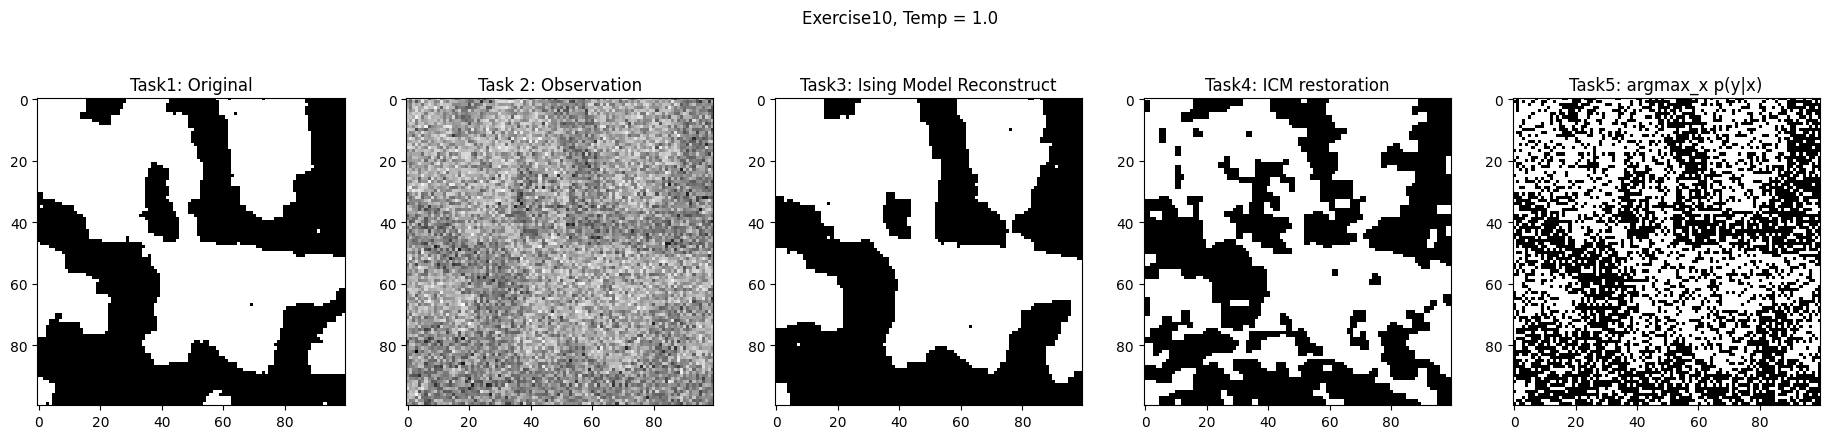

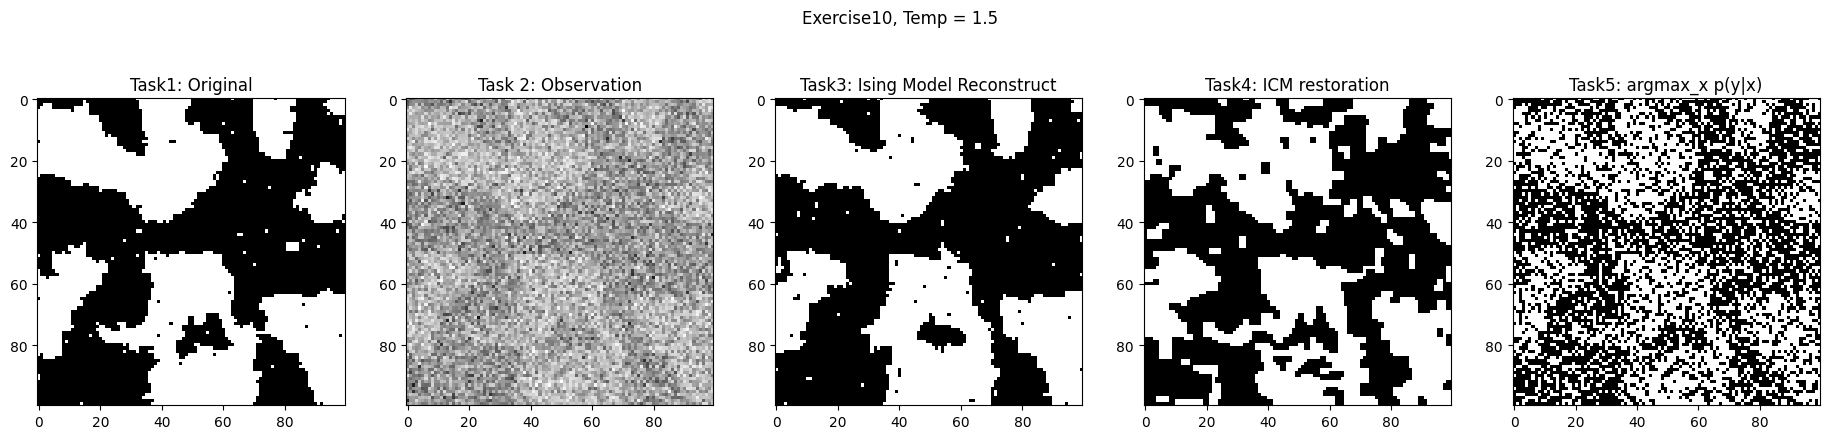

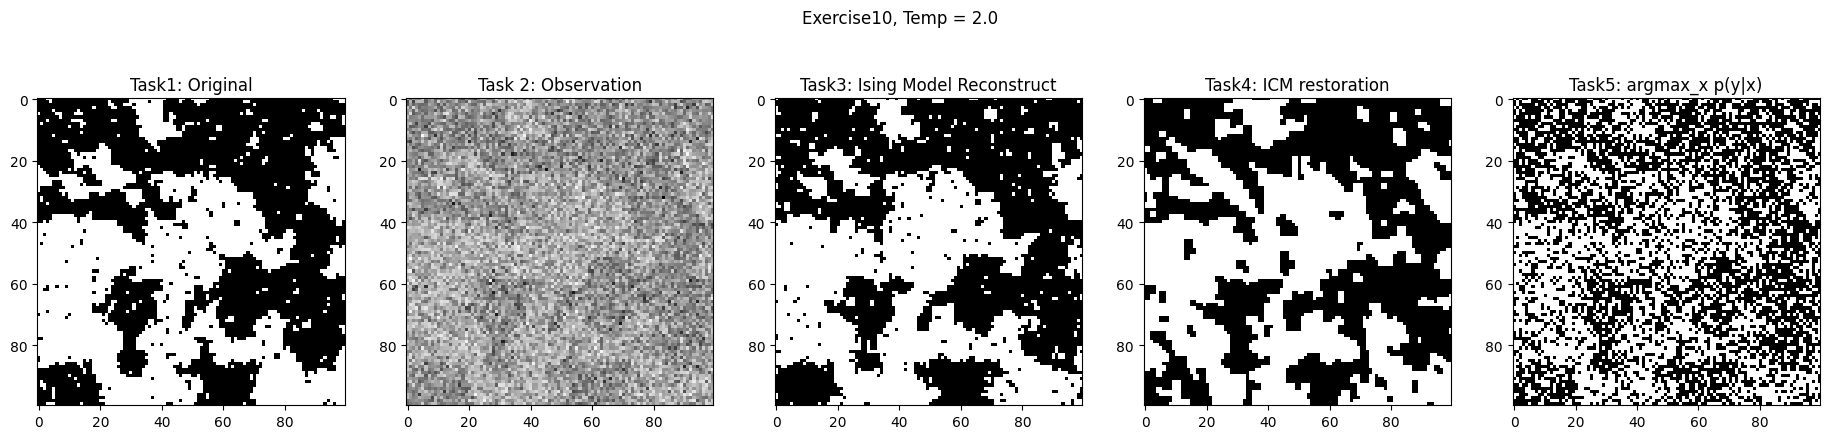

In [106]:
temps = np.array([1,1.5,2])
#Run all models and see how they work with different temperatures.
for temp in temps:
    fig, axs = plt.subplots(1,5)
    fig.suptitle('Exercise10, Temp = '+ str(temp))
    #
    pic = CreatePicture(temp)
    axs[0].imshow(pic[1:101,1:101], vmin=-1,cmap="Greys", vmax=+1 , interpolation="None")
    axs[0].set_title('Task1: Original')
    #
    NoisyPic = AddNoise(pic, axs)
    axs[1].imshow(NoisyPic[1:101,1:101], cmap="Greys" , interpolation="None")
    axs[1].set_title('Task 2: Observation')
    #
    ReconIsing = IsingModel(NoisyPic, temp, axs)
    axs[2].imshow(ReconIsing[1:101,1:101], vmin=-1,cmap="Greys", vmax=+1 , interpolation="None")
    axs[2].set_title('Task3: Ising Model Reconstruct')
    #
    ICM = ICM_Reconstruct(NoisyPic, temp, axs)
    axs[3].imshow(ICM[1:101,1:101], vmin=-1,cmap="Greys", vmax=+1 , interpolation="None")
    axs[3].set_title('Task4: ICM restoration')
    #
    arg = ArgMax_Reconstruct(NoisyPic, axs)
    axs[4].imshow(arg[1:101,1:101], vmin=-1,cmap="Greys", vmax=+1 , interpolation="None")
    axs[4].set_title('Task5: argmax_x p(y|x)')

    fig.set_size_inches(23, 5)
    plt.show()